# Car Price Prediction

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns
import datetime as dt
%matplotlib inline 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [2]:
Data=pd.read_csv("car_price_prediction.csv")
Data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [3]:
len(Data)

19237

# EDA🔎🧹

In [4]:
Data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
# num of row and col
Data.shape

(19237, 18)

In [6]:
#statistic of dataset
pd.options.display.float_format='{:,.2f}'.format 
Data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,"19,237.00","19,237.00","19,237.00","19,237.00","19,237.00"
mean,"45,576,535.89","18,555.93","2,010.91",4.58,6.58
std,"936,591.42","190,581.27",5.67,1.20,4.32
min,"20,746,880.00",1.00,"1,939.00",1.00,0.00
25%,"45,698,374.00","5,331.00","2,009.00",4.00,4.00
50%,"45,772,308.00","13,172.00","2,012.00",4.00,6.00
75%,"45,802,036.00","22,075.00","2,015.00",4.00,12.00
max,"45,816,654.00","26,307,500.00","2,020.00",16.00,16.00


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
# duplication?
Data.duplicated().sum()

313

In [9]:
# drop duplicate value 
Data.drop_duplicates(inplace= True)

In [10]:
# shape after dropping 
Data.shape

(18924, 18)

Missing value 

In [11]:

Data.isnull().sum() 
 

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [12]:
# unique value 
Data.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [13]:
Data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [14]:
# unique value of each columns *more detail*
for col in Data.columns:
    print(col,":",Data[col].nunique())
    
    print(Data[col].value_counts().nlargest(5))
    print ("_"*30)
     

ID : 18924
45654403    1
45802973    1
45769757    1
45792992    1
45776193    1
Name: ID, dtype: int64
______________________________
Price : 2315
15681    274
470      264
392      237
14113    236
10976    233
Name: Price, dtype: int64
______________________________
Levy : 559
-      5709
765     482
891     453
639     403
640     398
Name: Levy, dtype: int64
______________________________
Manufacturer : 65
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
Name: Manufacturer, dtype: int64
______________________________
Model : 1590
Prius      1069
Sonata     1067
Camry       929
Elantra     910
E 350       534
Name: Model, dtype: int64
______________________________
Prod. year : 54
2012    2131
2014    2090
2013    1913
2011    1582
2015    1527
Name: Prod. year, dtype: int64
______________________________
Category : 11
Sedan        8600
Jeep         5378
Hatchback    2799
Minivan       633
Coupe         528
Name: Category

Average price of HONDA and BMW

In [15]:

Data.groupby('Manufacturer').mean()["Price"]['HONDA']

14162.073958333332

In [16]:
Data.groupby('Manufacturer').mean()["Price"]['BMW']

20609.468146718147

Compare average price before and after 2015

In [17]:
Data[Data['Prod. year']>=2015]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.00,Automatic,Front,04-May,Left wheel,White,4
14,45732604,59464,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,76000 km,4.00,Automatic,Front,04-May,Left wheel,White,4
15,45465200,549,1079,TOYOTA,CHR,2018,Jeep,Yes,Petrol,2,74146 km,4.00,Automatic,Front,04-May,Left wheel,White,12
16,45772281,7683,810,HYUNDAI,Elantra,2016,Sedan,Yes,Petrol,1.8,121840 km,4.00,Automatic,Front,04-May,Left wheel,Blue,12
17,45797221,28382,810,HYUNDAI,Elantra,2016,Sedan,Yes,Petrol,1.8,54317 km,4.00,Automatic,Front,04-May,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19198,45804486,28225,934,TOYOTA,RAV 4,2015,Jeep,Yes,Petrol,2.5,149019 km,4.00,Automatic,4x4,04-May,Left wheel,Grey,0
19202,45808638,2587,900,KIA,Optima,2015,Sedan,Yes,Petrol,2.4,135410 km,4.00,Automatic,Front,04-May,Left wheel,Black,12
19211,45802856,50037,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,121902 km,4.00,Automatic,Front,04-May,Left wheel,Black,4
19215,45763841,470,831,HYUNDAI,Elantra,2017,Sedan,Yes,Petrol,1.6,25635 km,4.00,Automatic,Front,04-May,Left wheel,Black,12


In [18]:
Data[Data['Prod. year']>=2015]["Price"].mean()

26915.77495272116

In [19]:
Data[Data['Prod. year']<=2015]["Price"].mean()

16288.537726229926

# Analysis📝 & Visualiation📊

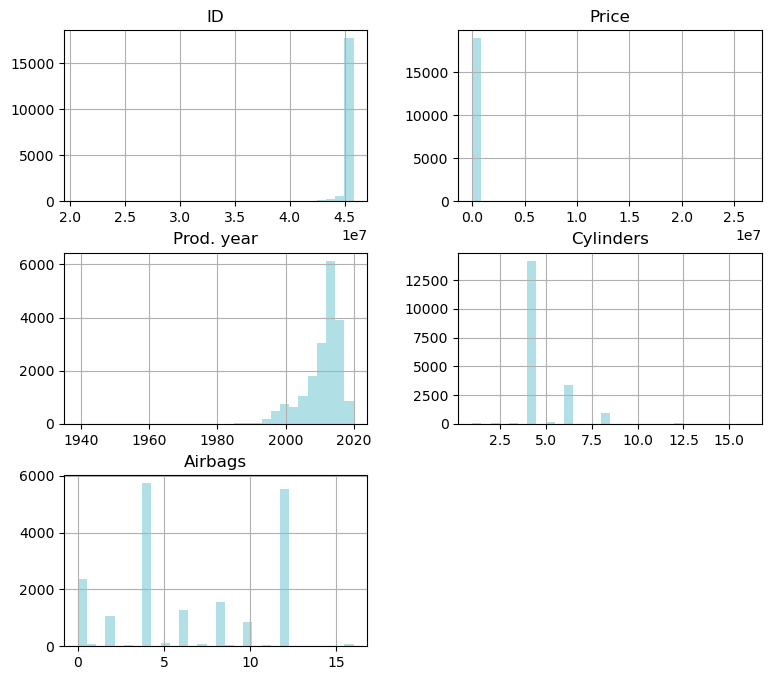

In [20]:
Data.hist( figsize=(9, 8) ,bins = 30, color='#b0e0e6' ,alpha = 1)
plt.show()

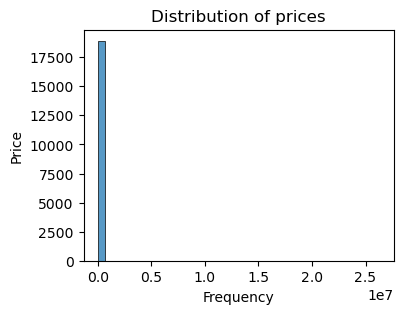

In [21]:
plt.figure(figsize=(4,3))
sns.histplot(Data.Price,bins=40)
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.title("Distribution of prices")
plt.show()


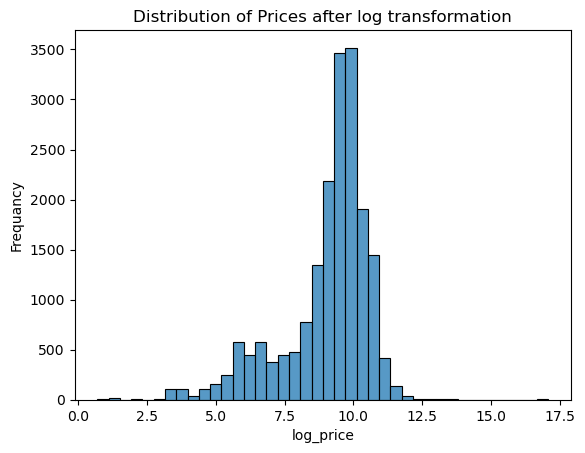

In [22]:
# near to normal distribution 
Data['log_price']=np.log1p(Data.Price)
sns.histplot(Data.log_price,bins=40)
plt.xlabel("log_price")
plt.ylabel("Frequancy")
plt.title("Distribution of Prices after log transformation")
plt.show()

In [23]:
Data.Price.skew()

135.38772637953886

In [24]:
Data.log_price.skew()

-1.3804761223724686

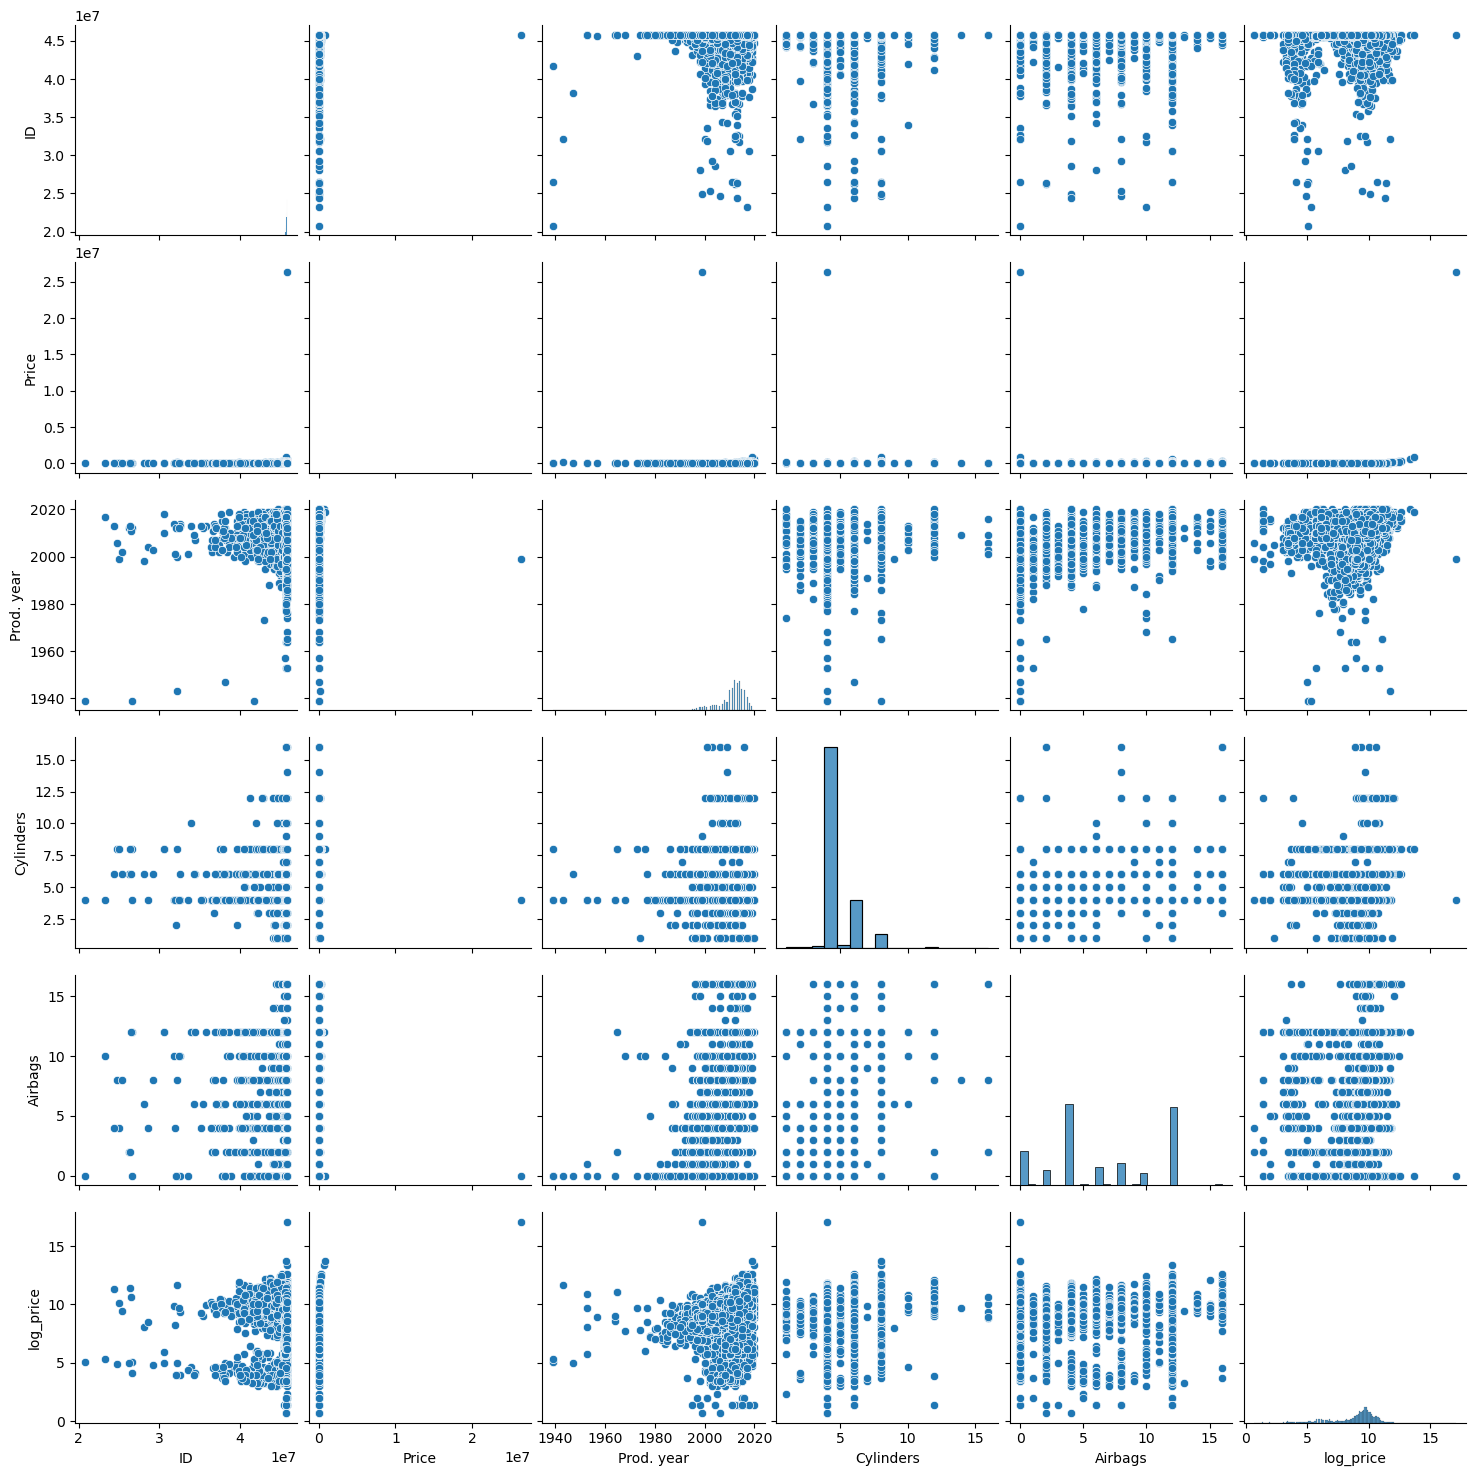

In [25]:
#pairplot -->Measure the relation , correlation and dependency between all numerical vairiables
sns.pairplot(Data)
plt.show()

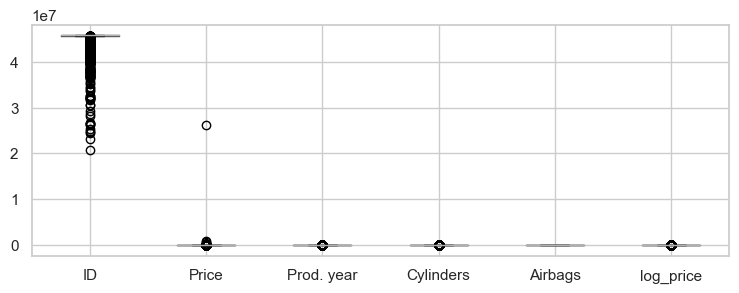

In [26]:
sns.set(style="whitegrid")
Data.boxplot(figsize=(9,3))
plt.show()

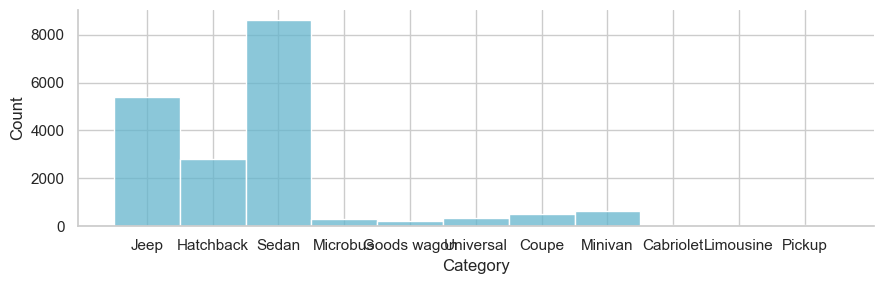

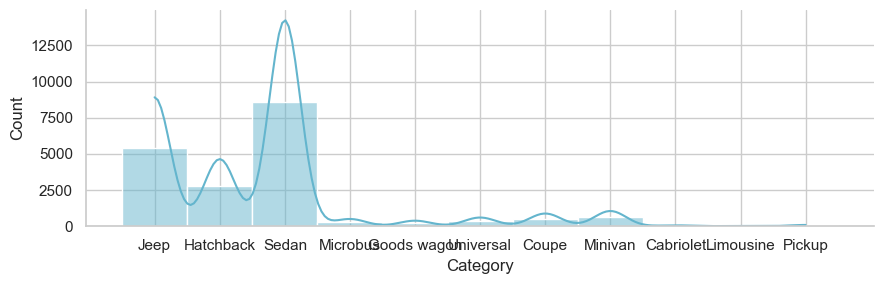

In [27]:
sns.displot(Data['Category'], color='c',height=3,aspect=3 )
plt.show()
sns.displot(Data['Category'], color='c',kde =True,height=3,aspect=3)
plt.show()


In [28]:
cor= Data.select_dtypes(exclude=object).corr()
cor

,ID,Price,Prod. year,Cylinders,Airbags,log_price
ID,1.00,-0.00,0.07,-0.04,-0.02,0.06
Price,-0.00,1.00,0.01,0.01,-0.01,0.10
Prod. year,0.07,0.01,1.00,-0.10,0.24,0.14
Cylinders,-0.04,0.01,-0.10,1.00,0.17,-0.04
Airbags,-0.02,-0.01,0.24,0.17,1.00,-0.10
log_price,0.06,0.10,0.14,-0.04,-0.10,1.00


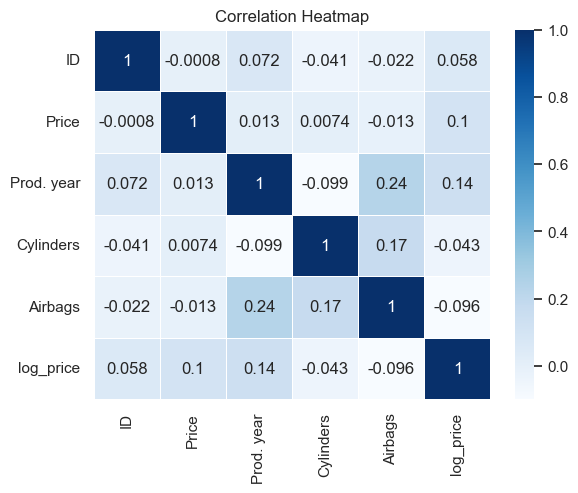

In [29]:
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:>

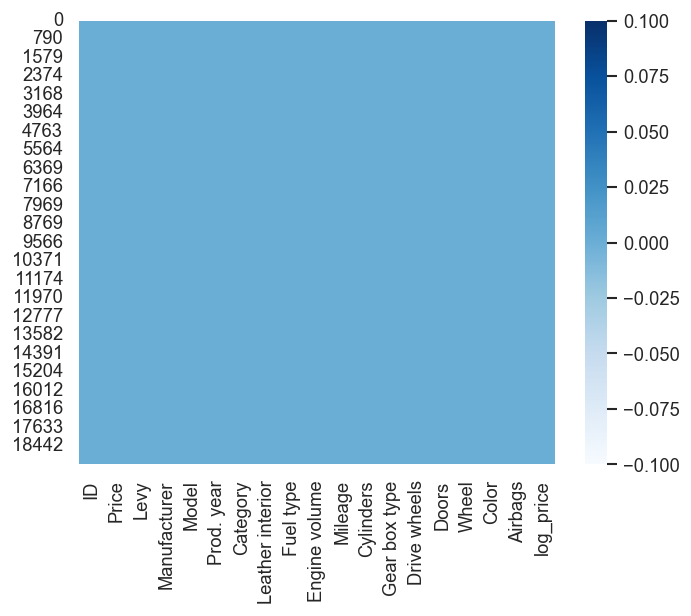

In [30]:
plt.figure(dpi=120)
sns.heatmap(Data.isna(),cmap='Blues')

In [31]:
for col in Data.columns:
    print(f'Category in {col} is :\n {Data[col].unique()}\n')
    print('_'*30)

Category in ID is :
 [45654403 44731507 45774419 ... 45804997 45793526 45813273]

______________________________
Category in Price is :
 [13328 16621  8467 ... 56814 63886 22075]

______________________________
Category in Levy is :
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' 

In [32]:
Data=Data.drop(['ID','Doors'],axis=1)

In [33]:
# Replacing '-' with 0
Data['Levy']=Data['Levy'].replace('-','0')

# Converting Levy type to float
Data['Levy'] = Data['Levy'].astype('float64')

In [34]:
dtime = dt.datetime.now()
Data['Age']=dtime.year - Data['Prod. year']

In [35]:
Data = Data.drop('Prod. year',axis=1)

In [36]:
Data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,log_price,Age
0,13328,"1,399.00",LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,Left wheel,Silver,12,9.50,13
1,16621,"1,018.00",CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,Left wheel,Black,8,9.72,12
2,8467,0.00,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,Right-hand drive,Black,2,9.04,17
3,3607,862.00,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.00,Automatic,4x4,Left wheel,White,0,8.19,12
4,11726,446.00,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.00,Automatic,Front,Left wheel,Silver,4,9.37,9


In [37]:
# Replacing 'Km' with ''  
Data['Mileage'] =Data['Mileage'].str.replace('km',"")

# Converting Mileage type to int64
Data.Mileage = Data.Mileage.astype('Int64')

In [38]:
Data.Mileage.head()

0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage, dtype: Int64

In [39]:
# Replacing 'Turbo' with '' 
Data['Engine volume'] = Data['Engine volume'].str.replace('Turbo','')

# Converting Levy type to float
Data['Engine volume'] = Data['Engine volume'].astype('float64')

In [40]:
Data['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [46]:
Data.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,log_price,Age
0,32,1242,4,1,2,0,0,0,12,13328,"1,399.00",3.50,186005,6.00,12,9.50,13
1,8,658,4,0,5,2,0,0,1,16621,"1,018.00",3.00,192000,6.00,8,9.72,12
2,21,684,3,0,5,3,1,1,1,8467,0.00,1.30,200000,4.00,2,9.04,17
3,16,661,4,1,2,0,0,0,14,3607,862.00,2.50,168966,4.00,0,8.19,12
4,21,684,3,1,5,0,1,0,12,11726,446.00,1.30,91901,4.00,4,9.37,9


In [42]:
obdata = Data.select_dtypes(include=object)
numdata = Data.select_dtypes(exclude=object)

In [43]:
for i in range(0,obdata.shape[1]):
    obdata.iloc[:,i] = lab.fit_transform(obdata.iloc[:,i])  

In [44]:
Data = pd.concat([obdata,numdata],axis=1)

In [48]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      18924 non-null  int32  
 1   Model             18924 non-null  int32  
 2   Category          18924 non-null  int32  
 3   Leather interior  18924 non-null  int32  
 4   Fuel type         18924 non-null  int32  
 5   Gear box type     18924 non-null  int32  
 6   Drive wheels      18924 non-null  int32  
 7   Wheel             18924 non-null  int32  
 8   Color             18924 non-null  int32  
 9   Price             18924 non-null  int64  
 10  Levy              18924 non-null  float64
 11  Engine volume     18924 non-null  float64
 12  Mileage           18924 non-null  Int64  
 13  Cylinders         18924 non-null  float64
 14  Airbags           18924 non-null  int64  
 15  log_price         18924 non-null  float64
 16  Age               18924 non-null  int64 

In [49]:
x= Data.drop('Price',axis=1)
y= Data['Price']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [51]:
algorithm = ['LinearRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingRegressor','SVR']
R2=[]
RMSE = []

In [52]:
def models(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test,pre)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(x_test,y_test)
    print(f'The Score of Model is :{score}')

In [53]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = SVR()

In [56]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)

The Score of Model is :0.0697997716793104
The Score of Model is :0.9999292819822736
The Score of Model is :0.9999227245339198
The Score of Model is :0.9994459746160609
The Score of Model is :-0.04979476009612793


In [67]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)

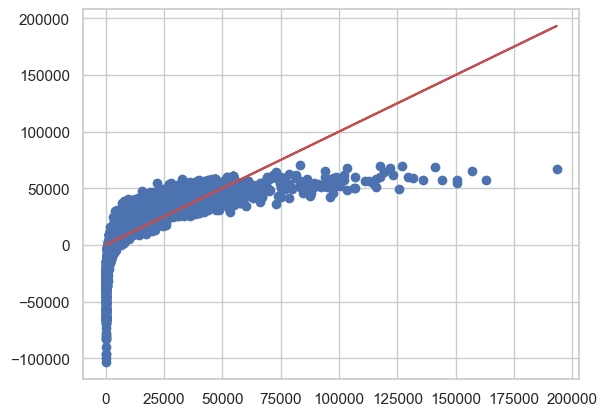

In [71]:
plt.scatter(y_test,y_pred1)
plt.plot(y_test,y_test,'r')
plt.show()

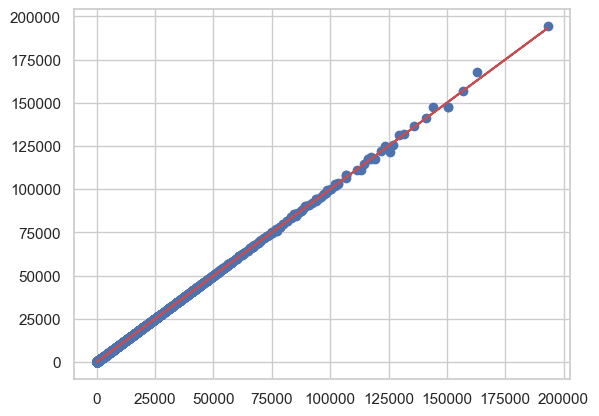

In [72]:
plt.scatter(y_test,y_pred2)
plt.plot(y_test,y_test,'r')
plt.show()